In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [17]:
def readDataframe(angles):
  # angles = [45,63,72]
  dfs = []
  for angle in angles:
    dfs.append( pd.read_excel('resultados_'+str(int(angle))+'g.xlsx', sheet_name=['dados_radial',"dados_wall", "dados_axis", "dados_wall_tail", 'vorticidade','turbulencia']))
  return dfs

In [18]:
angles = [45,63,72]
dfs = readDataframe(angles)

In [19]:
df_45 = pd.read_excel('resultados_45g.xlsx', sheet_name=['dados_radial','dados_wall','dados_axis','dados_wall_tail','vorticidade','turbulencia'])
df_63 = pd.read_excel('resultados_63g.xlsx',  sheet_name=['dados_radial','dados_wall','dados_axis','dados_wall_tail','vorticidade','turbulencia'])
df_72 = pd.read_excel('resultados_72g.xlsx',  sheet_name=['dados_radial','dados_wall','dados_axis','dados_wall_tail','vorticidade','turbulencia'])

## Velocity Axial and Tangencial 

In [35]:
def plotVel(direction, distances):
    plt.figure(figsize=(20, 16))
    for d,i in zip(distances,plot):
       plt.subplot(2,2,i) 
       plt.scatter(df_45['dados_radial']['r_' + str(int(d))+'d' ].div(R), df_45['dados_radial']['vel_' + direction  + '_' + str(int(d))+'d' ].div(Ub), label=str(int(d))+'D - 45º')
       plt.scatter(df_63['dados_radial']['r_' + str(int(d))+'d' ].div(R), df_63['dados_radial']['vel_' + direction  + '_' + str(int(d))+'d' ].div(Ub), label=str(int(d))+'D - 63º')
       plt.scatter(df_72['dados_radial']['r_' + str(int(d))+'d' ].div(R), df_72['dados_radial']['vel_' + direction  + '_' + str(int(d))+'d' ].div(Ub), label=str(int(d))+'D - 72º')

       plt.rcParams['xtick.labelsize'] = 16
       plt.rcParams['ytick.labelsize'] = 16
       plt.xlabel("r/R",  fontdict={'size': 25})
       if direction == 'tang':
           plt.ylabel("w/$U_{b}$",  fontdict={'size': 25})
       elif direction == 'axial':
           plt.ylabel("u/$U_{b}$",  fontdict={'size': 25})
       elif direction == 'radial':
           plt.ylabel("v/$U_{b}$",  fontdict={'size': 25})
       plt.grid(True)
       plt.legend(loc="best", prop={'size': 20})   
       plt.show;
    
    

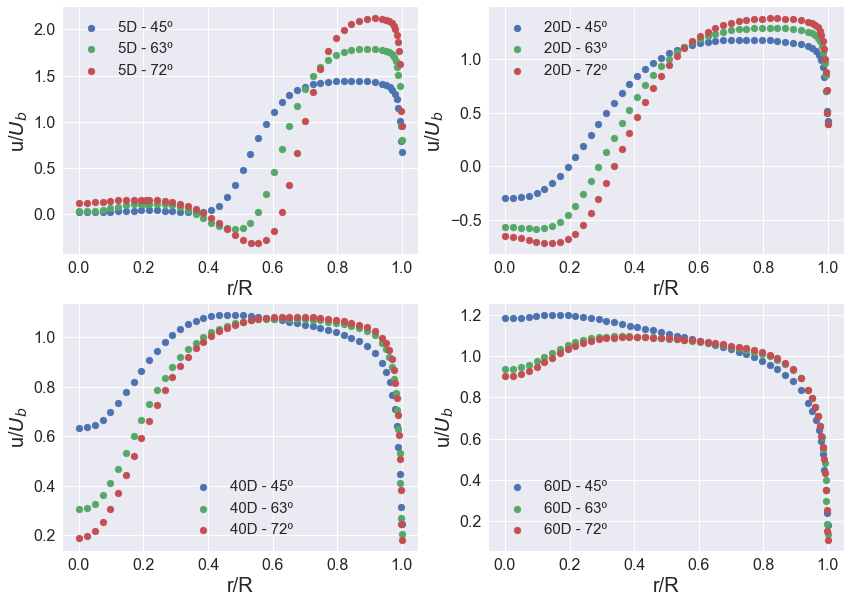

In [15]:
Ub = 1 #vel bulk
R = 0.025 #Raio max
plot=[1,2,3,4]
distances = [5,20,40,60]
plotVel('axial', distances)
plt.savefig('graficos_v2/velaxial_radial.png')

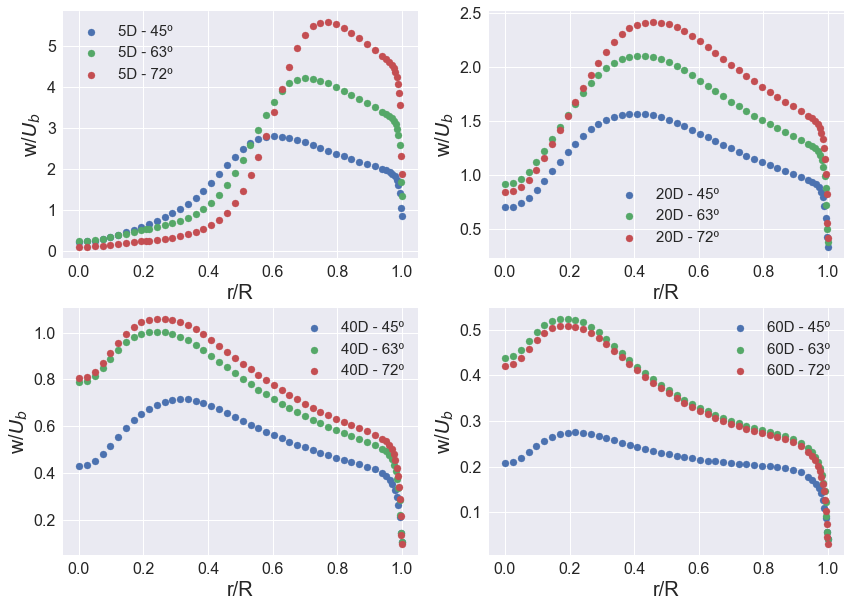

In [16]:
plotVel('tang', distances)
plt.savefig('graficos_v2/veltang_radial.png')

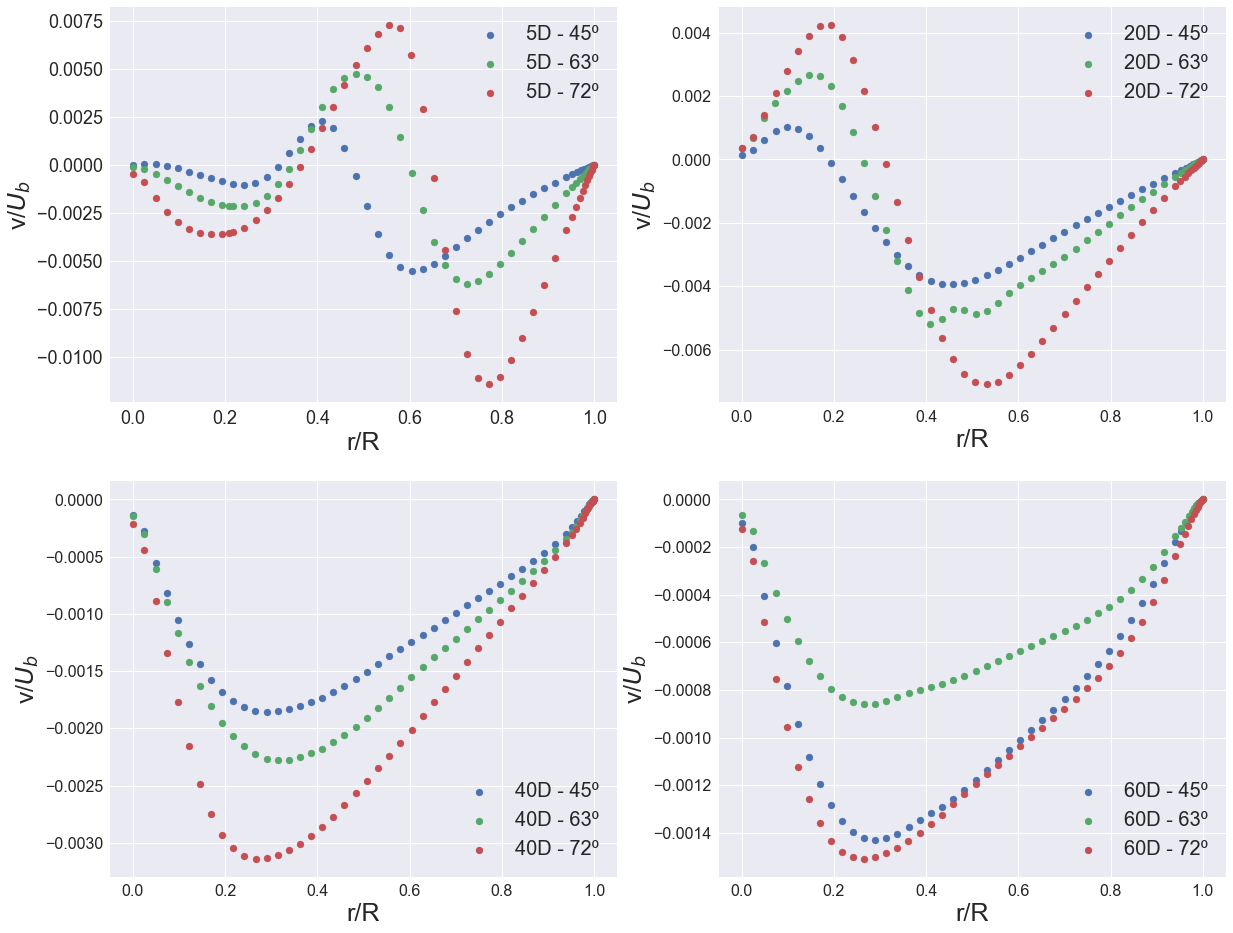

In [36]:
plotVel('radial', distances)
plt.savefig('graficos_v2/velradial_radial.png')

## Swirl number

In [120]:
def plotS(df, distances, angle):
  
  Sss = []
  for d in distances:
    Sss.append ( (2*np.pi*(np.trapz((df['dados_radial']['vel_axial_' + str(int(d)) + 'd']*df['dados_radial']['r_'+ str(int(d)) +'d']*df['dados_radial']['vel_tang_'+ str(int(d)) +'d']*df['dados_radial']['r_'+ str(int(d)) +'d']), df['dados_radial']['r_'+ str(int(d)) +'d'])))/(np.pi*(R**3)*(Ub**2)))
  S_tot = Sss #S_5d,S_10d,S_15d,S_20d,S_30d,S_40d,S_50d,S_60d
  x = distances

  #Gráfico Swirl Number
  plt.scatter(x, S_tot,marker='o', label='Numerical '+str(int(angle))+'º')
  
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  plt.xlabel("x/D", fontdict={'size': 20})
  plt.ylabel("S/$S_{0}$", fontdict={'size': 20})
  plt.grid(True)
  plt.legend(loc="best", prop={'size': 15})
  #plt.savefig('graficos/intensidade_giro.png')
  plt.show;

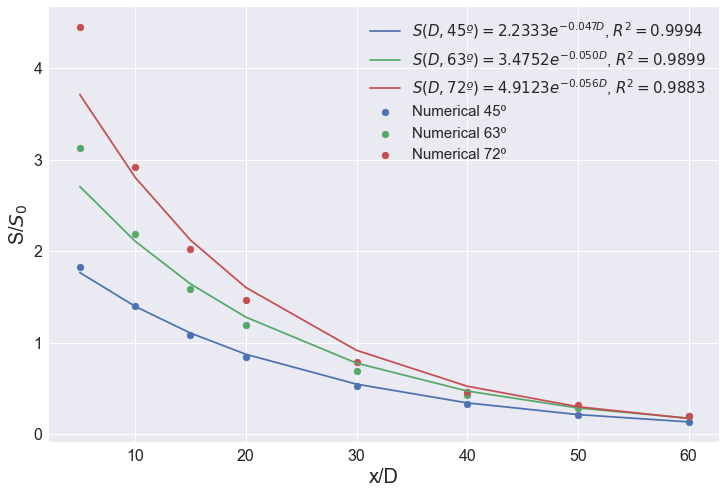

In [121]:
distances = [5,10,15,20,30,40,50,60]
R = 0.025
Ub = 0.984712482
plt.figure(figsize=(12, 8))
y_45=np.array([-0.235,-0.47,-0.705,-0.94,-1.41,-1.88,-2.35,-2.82])
plt.plot(distances, 2.2333*np.exp(y_45), label='$S(D, 45º)=2.2333 e^{-0.047D}$, $R^{2}=0.9994$')   

y_63=np.array([-0.25,-0.5,-0.75,-1,-1.5,-2,-2.5,-3])
plt.plot(distances, 3.4752*np.exp(y_63), label='$S(D, 63º)=3.4752 e^{-0.050D}$, $R^{2}=0.9899$')   

y_72=np.array([-0.28,-0.56,-0.84,-1.12,-1.68,-2.24,-2.8,-3.36])
plt.plot(distances, 4.9123*np.exp(y_72), label='$S(D, 72º)=4.9123 e^{-0.056D}$, $R^{2}=0.9883$')   

for df, angle in zip(dfs, angles):
  plotS(df, distances, angle)

## Min. axial velocity

In [168]:
def plotVelaxialmin(df, distances, angle):
  vtm = []
  for d in distances:
   vtm.append (df['dados_radial']['vel_axial_' + str(int(d)) + 'd'].min())
  a = vtm
  x = distances

  #Gráfico Swirl Number
  plt.plot(x, vtm,marker='o', label=str(int(angle))+'º')
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  plt.xlabel("x/D", fontdict={'size': 20})
  plt.ylabel("$u_{min}$ [m/s]", fontdict={'size': 20})
  plt.grid(True)
  plt.legend(loc="best", prop={'size': 20})
  #plt.savefig('graficos/velaxialmin_axis.png')
  plt.show;

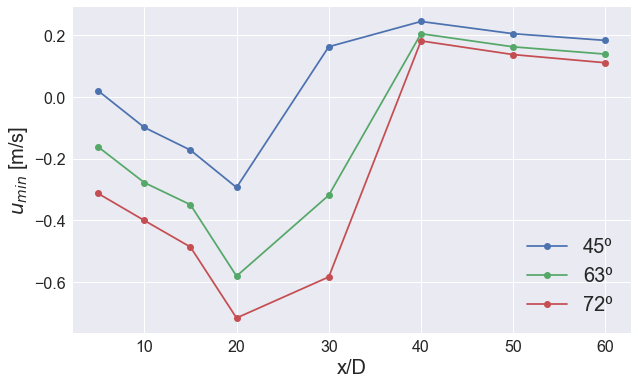

In [170]:
plt.figure(figsize=(10, 6))
distances = [5,10,15,20,30,40,50,60]
for df, angle in zip(dfs, angles):
  plotVelaxialmin(df, distances, angle)
plt.savefig('graficos_v2/velaxialmin_axis.png')

## Axial velocity axis

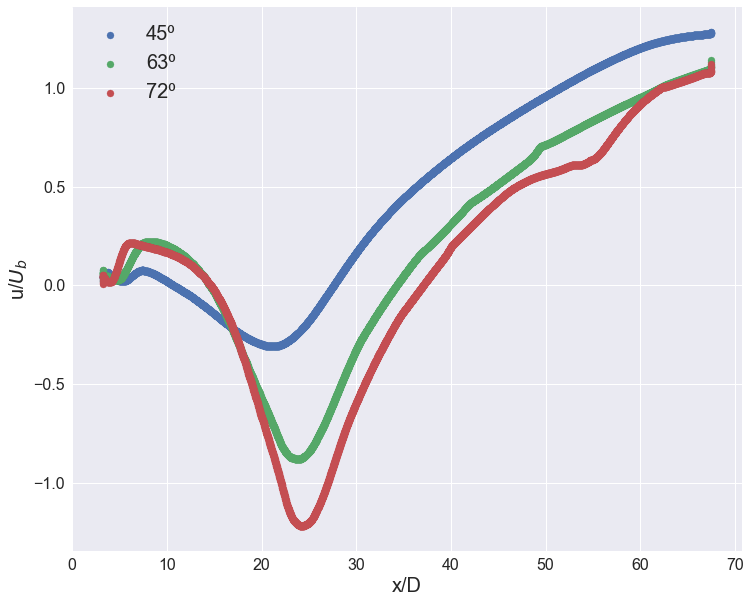

In [171]:
plt.figure(figsize=(12, 10))
D=0.05
Ub=0.984712482

plt.scatter(df_45['dados_axis']['x_axis'].div(D), df_45['dados_axis']['vel_mean_axial_axis_45g'].div(Ub), label='45º')
plt.scatter(df_63['dados_axis']['x_axis'].div(D), df_63['dados_axis']['vel_mean_axial_axis_63g'].div(Ub), label='63º')
plt.scatter(df_72['dados_axis']['x_axis'].div(D), df_72['dados_axis']['vel_mean_axial_axis_72g'].div(Ub), label='72º')

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.xlabel("x/D", fontdict={'size': 20})
plt.ylabel("u/$U_{b}$", fontdict={'size': 20})
plt.grid(True)
plt.legend(loc="best", prop={'size': 20})   
plt.show;
plt.savefig('graficos_v2/velaxial_axis.png')

## Static and Total Pressure Axis

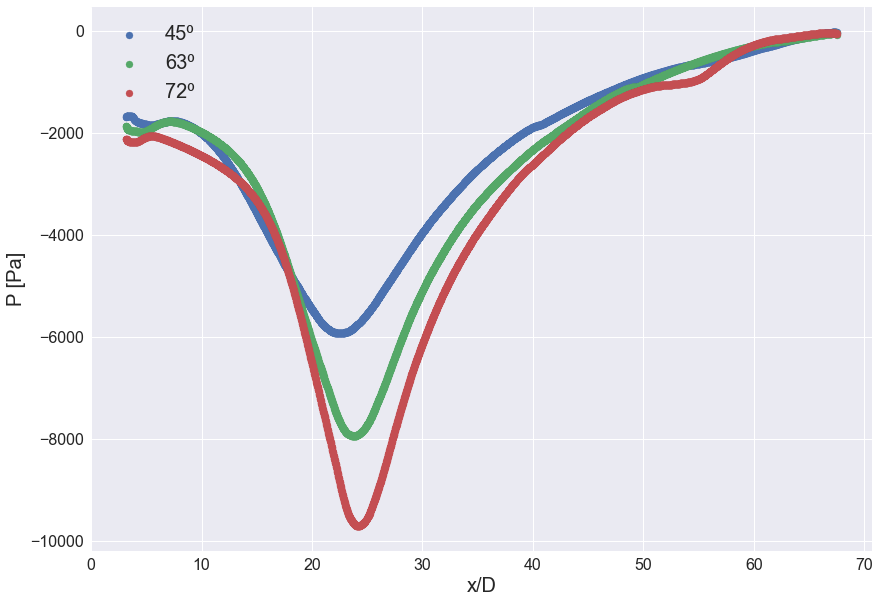

In [172]:
plt.figure(figsize=(14, 10))

#plt.subplot(2,1,1)
#plt.title('Total Pressure Axis',  fontdict={'size': 20})
#plt.scatter(df_45['dados_axis']['x_axis'].div(D), df_45['dados_axis']['pressao_total_axis'], label='45º')
#plt.scatter(df_63['dados_axis']['x_axis'].div(D), df_63['dados_axis']['pressao_total_axis'], label='63º')
#plt.scatter(df_72['dados_axis']['x_axis'].div(D), df_72['dados_axis']['pressao_total_axis'], label='72º')
#plt.rcParams['xtick.labelsize'] = 16
#plt.rcParams['ytick.labelsize'] = 16
#plt.xlabel("x/D", fontdict={'size': 20})
#plt.ylabel("$P_{0}$ [Pa]", fontdict={'size': 20})

#plt.subplot(2,1,2)
#plt.title('Static Pressure Axis',  fontdict={'size': 20})
plt.scatter(df_45['dados_axis']['x_axis'].div(D), df_45['dados_axis']['pressao_estatica_axis'], label='45º')
plt.scatter(df_63['dados_axis']['x_axis'].div(D), df_63['dados_axis']['pressao_estatica_axis'], label='63º')
plt.scatter(df_72['dados_axis']['x_axis'].div(D), df_72['dados_axis']['pressao_estatica_axis'], label='72º')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.xlabel("x/D", fontdict={'size': 20})
plt.ylabel("P [Pa]", fontdict={'size': 20})

plt.grid(True)
plt.legend(loc="best", prop={'size': 20})   
plt.show;
plt.savefig('graficos_v2/pressurestatic_axis.png')

## Static and Total Pressure Wall

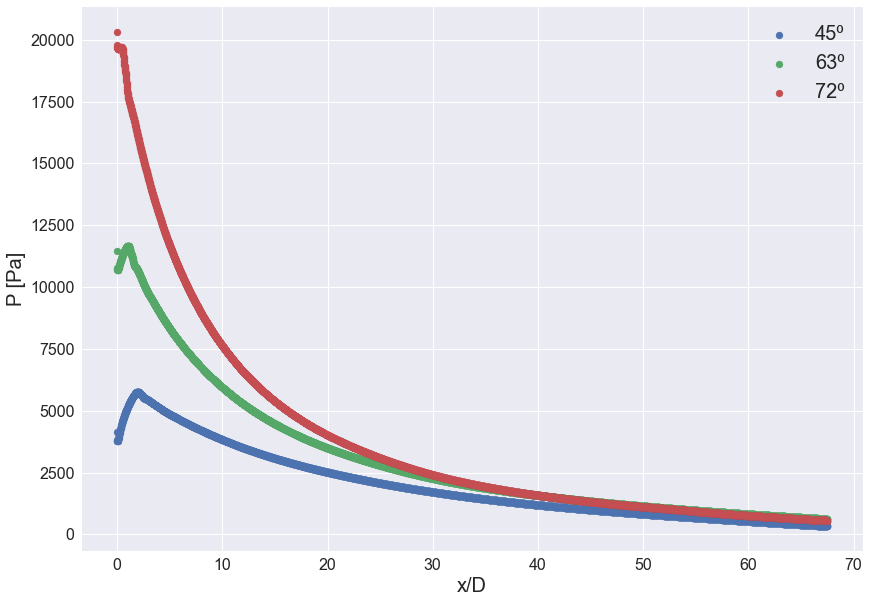

In [173]:
plt.figure(figsize=(14, 10))

#plt.subplot(2,1,1)
#plt.title('Total Pressure Wall',  fontdict={'size': 20})
#plt.scatter(df_45['dados_wall']['x_wall'].div(D), df_45['dados_wall']['pressao_total_wall'], label='45º')
#plt.scatter(df_63['dados_wall']['x_wall'].div(D), df_63['dados_wall']['pressao_total_wall'], label='63º')
#plt.scatter(df_72['dados_wall']['x_wall'].div(D), df_72['dados_wall']['pressao_total_wall'], label='72º')
#plt.rcParams['xtick.labelsize'] = 16
#plt.rcParams['ytick.labelsize'] = 16
#plt.xlabel("x/D", fontdict={'size': 20})
#plt.ylabel("$P_{0}$ [Pa]", fontdict={'size': 20})

#plt.subplot(2,1,2)
#plt.title('Static Pressure Wall',  fontdict={'size': 20})
plt.scatter(df_45['dados_wall']['x_wall'].div(D), df_45['dados_wall']['pressao_estatica_wall'], label='45º')
plt.scatter(df_63['dados_wall']['x_wall'].div(D), df_63['dados_wall']['pressao_estatica_wall'], label='63º')
plt.scatter(df_72['dados_wall']['x_wall'].div(D), df_72['dados_wall']['pressao_estatica_wall'], label='72º')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.xlabel("x/D", fontdict={'size': 20})
plt.ylabel("P [Pa]", fontdict={'size': 20})

plt.grid(True)
plt.legend(loc="best", prop={'size': 20})   
plt.show;
plt.savefig('graficos_v2/pressurestatic_wall.png')

## Gradient Pressure

In [667]:
def plotDp(distances):
  dp = []
  for d in distances:
    dp.append (df['dados_radial']['pressao_estatica_' + str(int(d)) + 'd'].mean())
  dp_tot=dp #S_5d,S_10d,S_15d,S_20d,S_30d,S_40d,S_50d,S_60d
  x = distances
  plt.figure(figsize=(14, 10))
#dx_45=np.diff(df_45['dados_wall']['x_wall'])
#dp_45=np.diff(df_45['dados_wall']['pressao_estatica_wall'])
  plt.scatter(distances, dp_tot, label='45º')
  plt.rcParams['xtick.labelsize'] = 16
  plt.rcParams['ytick.labelsize'] = 16
  plt.xlabel("x/D", fontdict={'size': 20})
  plt.ylabel("P [Pa]", fontdict={'size': 20})

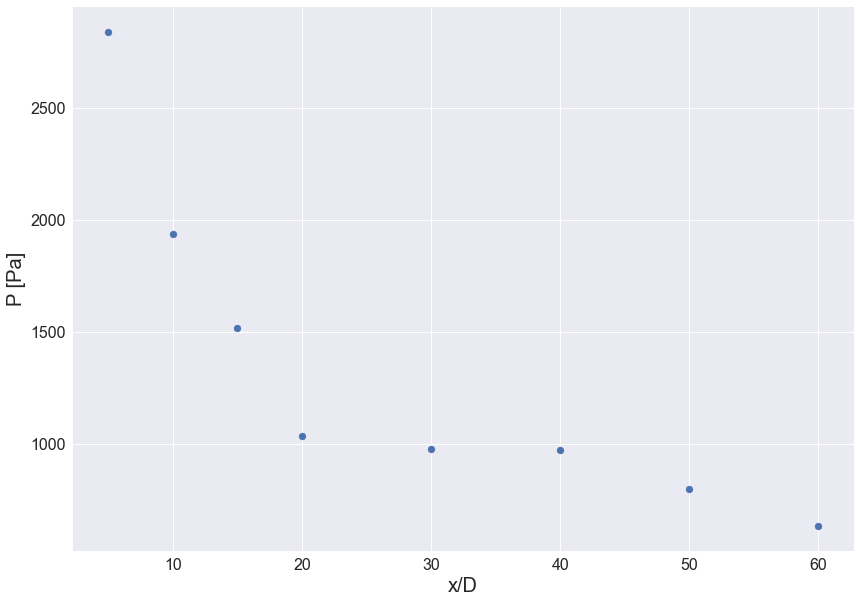

In [668]:
distances=[5,10,15,20,30,40,50,60]
plotDp(distances)


## Static and Total Pressure Radial

In [174]:
def plotPressureradial(direction, distances):
    plt.figure(figsize=(16, 14))
    for d,i in zip(distances,plot):
       plt.subplot(2,2,i) 
       plt.scatter(df_45['dados_radial']['r_' + str(int(d))+'d' ].div(R), df_45['dados_radial']['pressao_' + direction  + '_' + str(int(d))+'d' ], label=str(int(d))+'D - 45º')
       plt.scatter(df_63['dados_radial']['r_' + str(int(d))+'d' ].div(R), df_63['dados_radial']['pressao_' + direction  + '_' + str(int(d))+'d' ], label=str(int(d))+'D - 63º')
       plt.scatter(df_72['dados_radial']['r_' + str(int(d))+'d' ].div(R), df_72['dados_radial']['pressao_' + direction  + '_' + str(int(d))+'d' ], label=str(int(d))+'D - 72º')

       plt.rcParams['xtick.labelsize'] = 16
       plt.rcParams['ytick.labelsize'] = 16
       plt.xlabel("r/R",  fontdict={'size': 20})
       if direction == 'estatica':
           plt.ylabel("P [Pa]",  fontdict={'size': 20})
       elif direction == 'total':
           plt.ylabel("$P_{0}$ [Pa]",  fontdict={'size': 20})
       plt.grid(True)
       plt.legend(loc="best", prop={'size': 20})   
       plt.show;

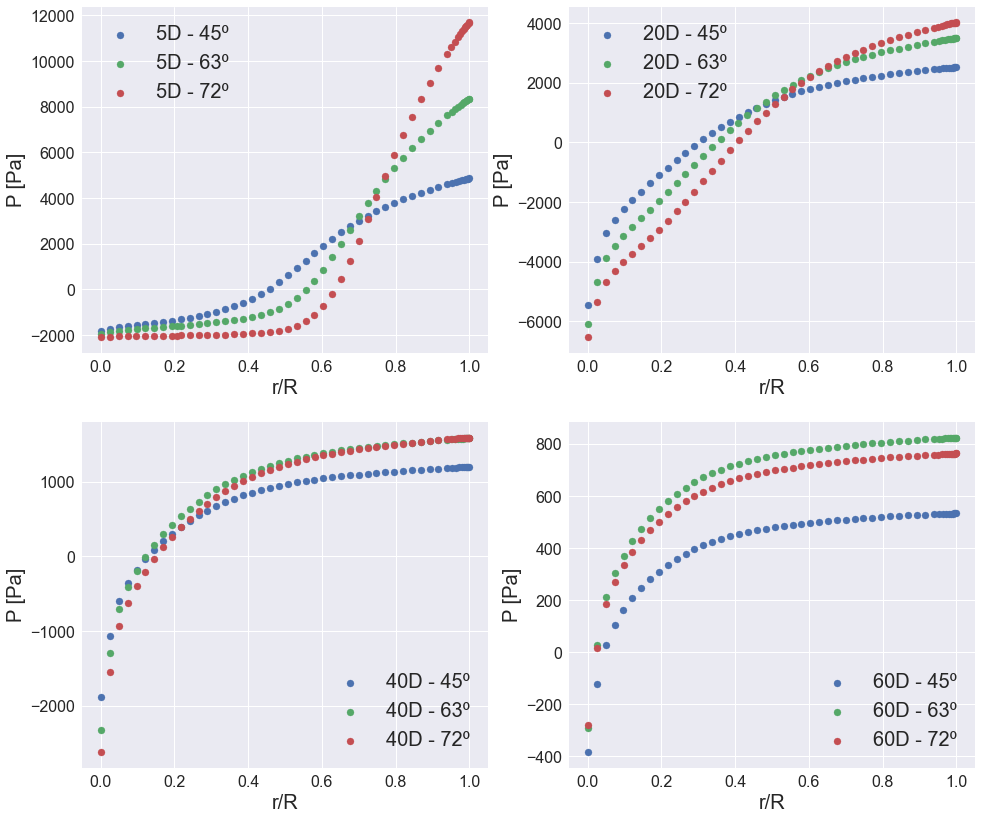

In [175]:
plot=[1,2,3,4]
distances = [5,20,40,60]
plotPressureradial('estatica', distances)
plt.savefig('graficos_v2/pressure_estatica_radial.png')

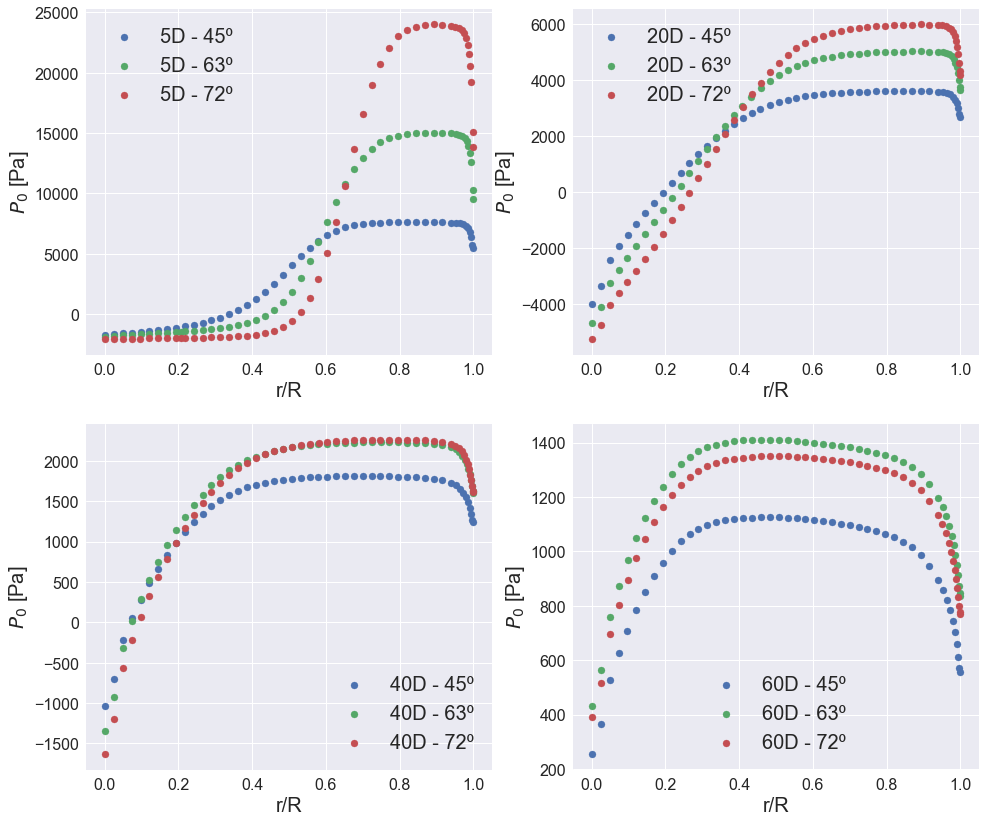

In [176]:
plot=[1,2,3,4]
distances = [5,20,40,60]
plotPressureradial('total', distances)
plt.savefig('graficos_v2/pressure_total_radial.png')

## Calculating the displacement of the max. tangential velocity in the radius

In [190]:
def velmax(df, distances, direction):
  plt.figure(figsize=(12, 10))
  plt.subplot(3,1,i)
  for d in distances: 
    x = np.array(df['dados_radial']['r_'+str(int(d))+'d'][df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'] == df['dados_radial']['vel_'+direction+'_'+str(int(d))+'d'].max() ].div(R))
    y = np.array(df['dados_radial']['vel_'+direction+'_' + str(int(d)) + 'd'].max())
    plt.scatter(x, y, label=str(int(d))+'D')

    plt.yticks(np.arange(0 , 6.25, 1))
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.xlabel("r/R", fontdict={'size': 20})
    if direction == 'tang':
      plt.ylabel("$w_{max}$/$U_{b}$", fontdict={'size': 20})
    elif direction == 'axial':
      plt.ylabel("$u_{max}$/$U_{b}$", fontdict={'size': 20})
    plt.grid(True)
    plt.legend(loc="best", prop={'size': 12})
    plt.show; 


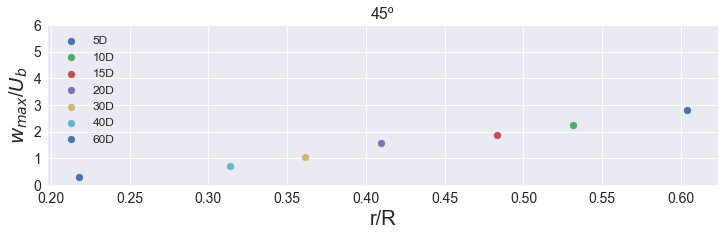

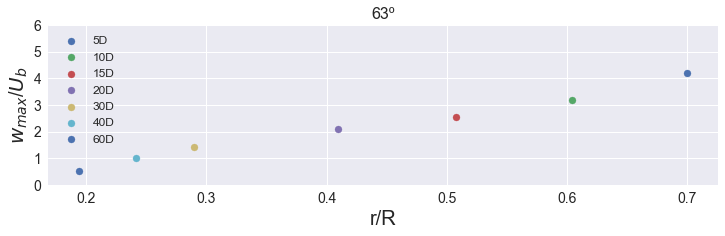

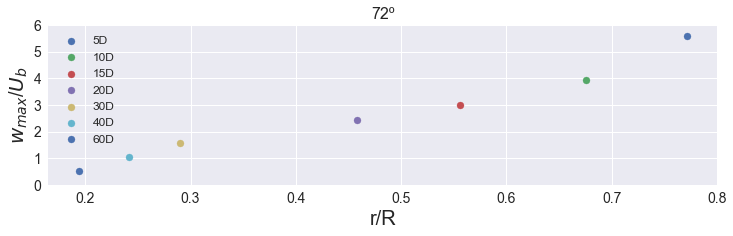

In [191]:
plot=[1,2,3]
distances = [5,10,15,20,30,40,60]
Ub=0.984712482

for (df,i,g) in zip(dfs, plot,angles):
 velmax(df, distances, 'tang')
 plt.title(''+ str(g) +'º',  fontdict={'size': 16})

##  Axial vorticity

In [227]:
def plotvortcompaxial(df, distances, direction):
  plt.figure(figsize=(12, 10))
  plt.subplot(3,1,i)
  for d in distances:
    vel_tang = df['dados_radial']['vel_tang_'+str(int(d))+'d']
    r_d = df['dados_radial']['r_'+str(int(d))+'d'].div(R)
    w_x=((1/r_d[:-1])*(vel_tang+(r_d[:-1]*np.diff(vel_tang)/np.diff(r_d))))
    plt.scatter(r_d,w_x,label=str(int(d))+'D')
    
    #plot vorticidade extraída do fluent
    #plt.scatter(df['vorticidade']['r_' + str(int(d)) + 'd'][1:], df['vorticidade']['vort_' + direction  + '_' + str(int(d)) +'d'][1:], label=str(int(d))+'D - fluent')
 
  plt.yticks(np.arange(-300, 100, 75))
  plt.rcParams['xtick.labelsize'] = 14
  plt.rcParams['ytick.labelsize'] = 14
  plt.xlabel("r/R", fontdict={'size': 20})
  plt.ylabel(" $\omega_{x}$ [$s^{-1}$]", fontdict={'size': 20})
  plt.grid(True)
  plt.legend(loc="best", prop={'size': 14})   
  plt.show;

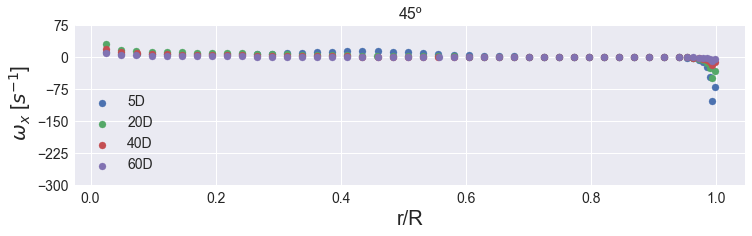

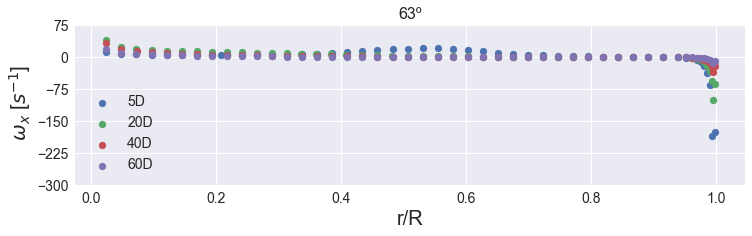

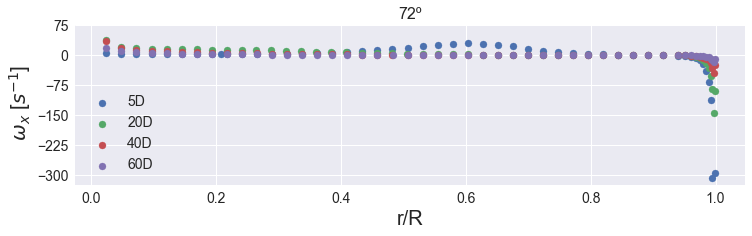

In [228]:
distances = [5,20,40,60]
R = 0.025
Ub = 0.984712482
for (df,i,g) in zip(dfs, plot,angles):
  plotvortcompaxial(df, distances, 'axial')
  plt.title(''+ str(g) +'º',  fontdict={'size': 16})
  #plt.savefig('graficos/vorticidade_axial_' + str(angle) + 'g.png')

## Gradient Velocity Tangencial

In [222]:
def velDivveltang(df, distances):
  plt.figure(figsize=(12, 10))
  plt.subplot(3,1,i)
  for d in distances: 
    vel_tang = df['dados_radial']['vel_tang_'+str(int(d))+'d']
    r_d = df['dados_radial']['r_'+str(int(d))+'d']
    div_v=np.diff(vel_tang)/np.diff(r_d)
    sns.color_palette("husl", 9)
    plt.scatter(str(int(d)), div_v.mean(), s=80, marker='s', label=str(int(d))+'D')

    plt.xlabel("x/D", fontdict={'size': 16})
    plt.ylabel("$\partial \\bar{w} /\partial r$", fontdict={'size': 16})
    plt.grid(True)
    plt.legend(loc="best", prop={'size': 12})
    plt.show; 

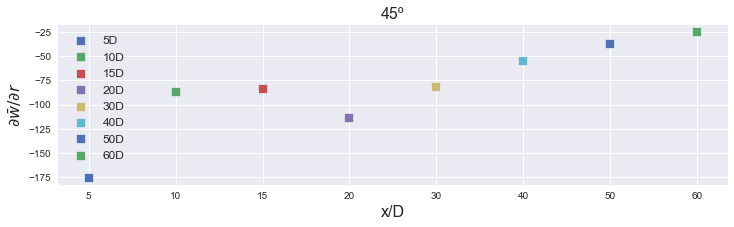

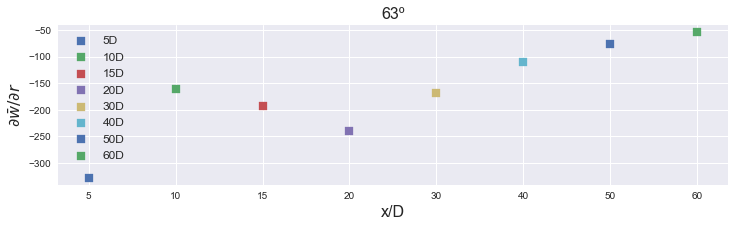

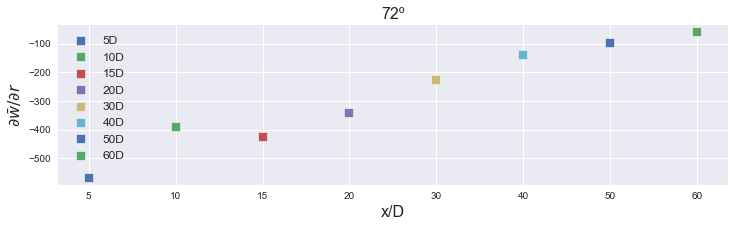

In [224]:
distances = [5,10,15,20,30,40,50,60]
for (df,i,g) in zip(dfs, plot,angles):
  velDivveltang(df, distances)
  plt.title(''+ str(g) +'º',  fontdict={'size': 16})

## Turbulent intensity

In [231]:
def plotTurbInt(distances,plot):
    plt.figure(figsize=(16, 12))
    for d,i in zip(distances,plot):
       plt.subplot(2,2,i) 
       plt.scatter(df_45['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_45['turbulencia']['turb_int_' +str(int(d))+'d'], label=str(int(d))+'D - 45º')
       plt.scatter(df_63['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_63['turbulencia']['turb_int_' +str(int(d))+'d'], label=str(int(d))+'D - 63º')
       plt.scatter(df_72['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_72['turbulencia']['turb_int_' +str(int(d))+'d'], label=str(int(d))+'D - 72º')

       #plt.yticks(np.arange(0, 0.5, 0.1))
       plt.rcParams['xtick.labelsize'] = 14
       plt.rcParams['ytick.labelsize'] = 14
       plt.xlabel("r/R", fontdict={'size': 20})
       plt.ylabel("Turbulent intensity [%]", fontdict={'size': 20})
       plt.grid(True)
       plt.legend(loc="best", prop={'size': 16})   
       plt.show;

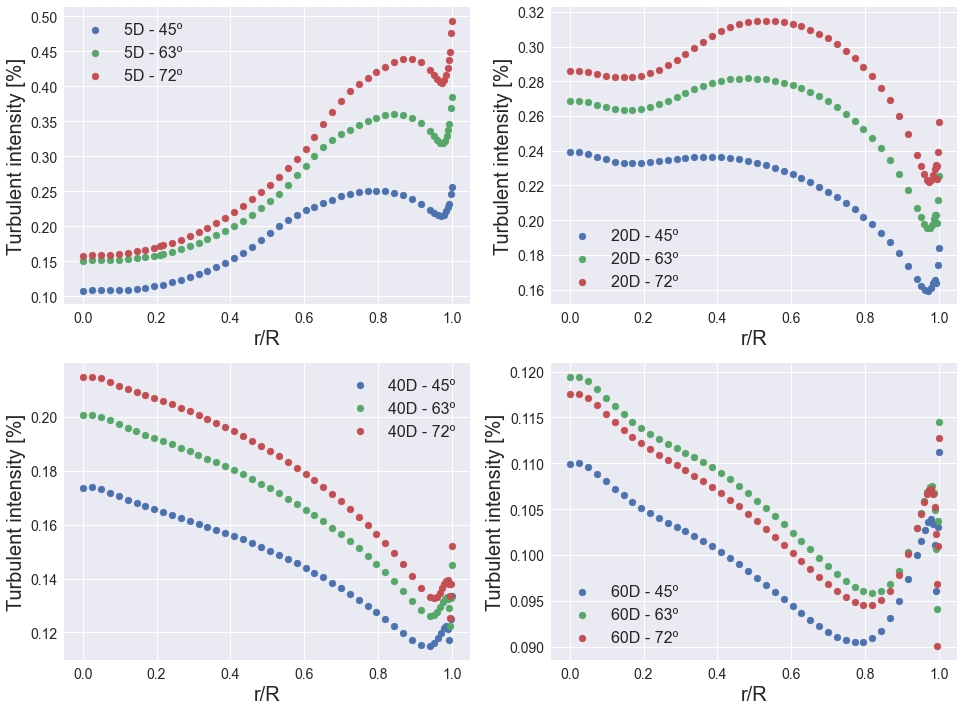

In [232]:
R = 0.025 #Raio max
plot=[1,2,3,4]
distances = [5,20,40,60]
plotTurbInt(distances,plot)
plt.savefig('graficos_v2/turb_int_radial.png')

## UV Reynolds Stress

In [233]:
def plotUV(distances,plot):
    plt.figure(figsize=(16, 12))
    for d,i in zip(distances,plot):
       plt.subplot(2,2,i) 
       plt.scatter(df_45['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_45['turbulencia']['uv_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 45º')
       plt.scatter(df_63['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_63['turbulencia']['uv_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 63º')
       plt.scatter(df_72['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_72['turbulencia']['uv_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 72º')
    
       plt.rcParams['xtick.labelsize'] = 14
       plt.rcParams['ytick.labelsize'] = 14
       plt.xlabel("r/R", fontdict={'size': 20})
       plt.ylabel(" $\\bar{u'}$ $\\bar{v'}$ [$m^{2}/s^{2}$]", fontdict={'size': 20})
       plt.grid(True)
       plt.legend(loc="best", prop={'size': 16})   
       plt.show;

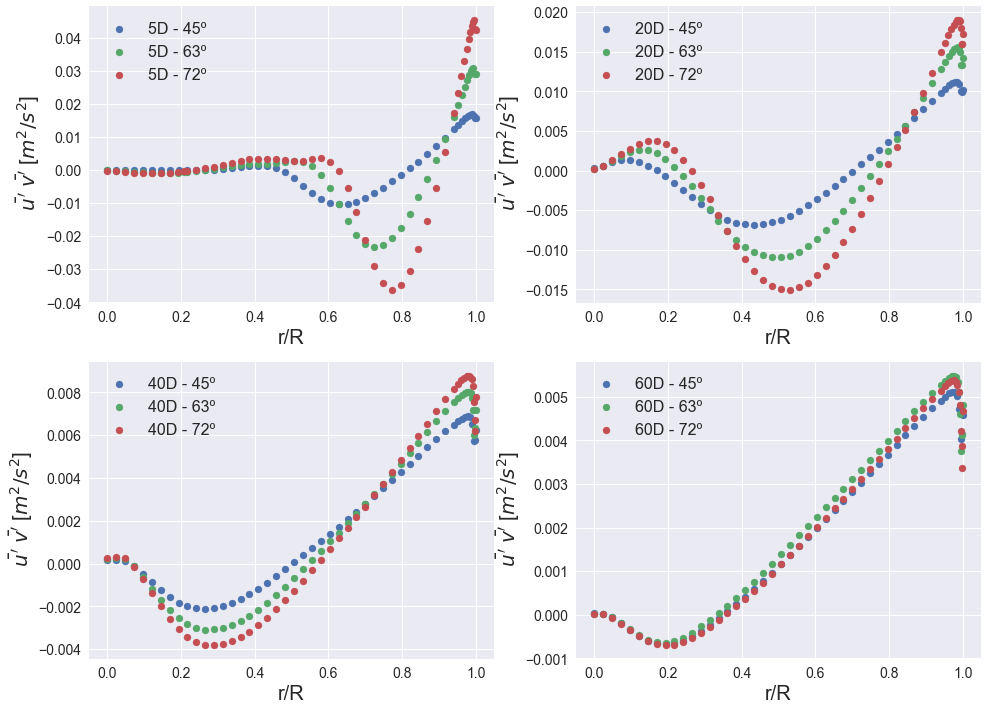

In [234]:
R = 0.025 #Raio max
plot=[1,2,3,4]
distances = [5,20,40,60]
plotUV(distances,plot)
plt.savefig('graficos_v2/turb_uv_radial.png')

## UW Reynolds Stress

In [236]:
def plotUW(distances,plot):
    plt.figure(figsize=(18, 12))
    for d,i in zip(distances,plot):
       plt.subplot(2,2,i) 
       plt.scatter(df_45['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_45['turbulencia']['uw_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 45º')
       plt.scatter(df_63['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_63['turbulencia']['uw_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 63º')
       plt.scatter(df_72['turbulencia']['r_' + str(int(d))+'d' ].div(R), df_72['turbulencia']['uw_rs_'+str(int(d))+'d'], label=str(int(d))+'D - 72º')

       plt.rcParams['xtick.labelsize'] = 14
       plt.rcParams['ytick.labelsize'] = 14
       plt.xlabel("r/R", fontdict={'size': 20}) 
       plt.ylabel("$\\bar{u'}$ $\\bar{w'}$ [$m^{2}/s^{2}$]", fontdict={'size': 20})
       plt.grid(True)
       plt.legend(loc="best", prop={'size': 16})   
       plt.show;

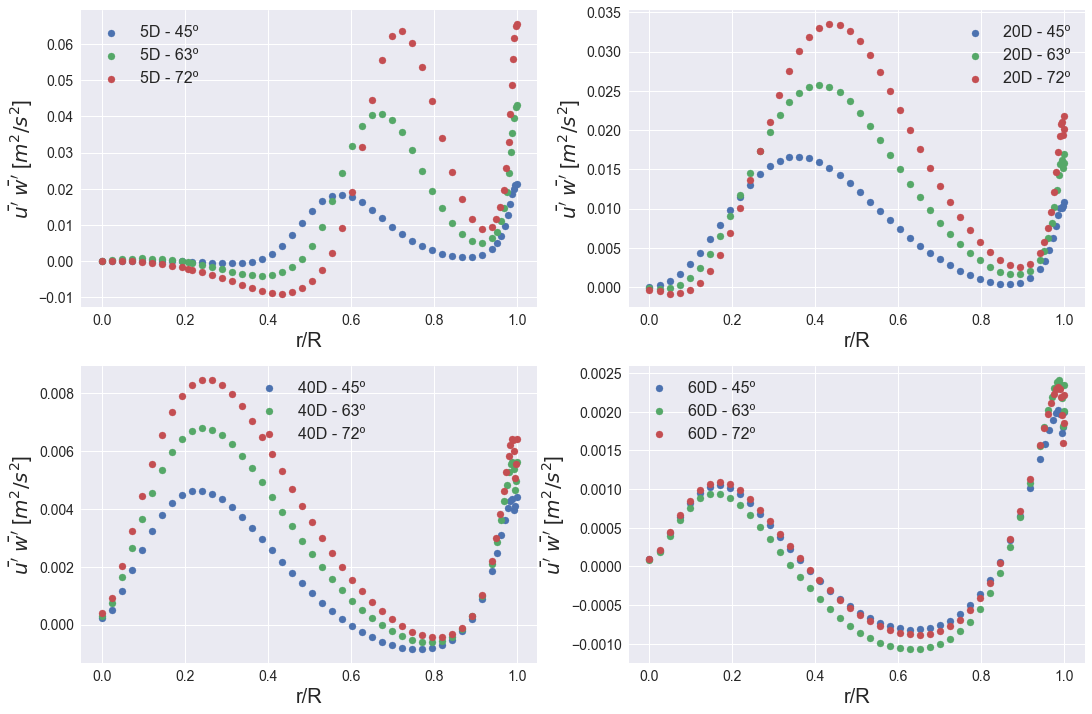

In [237]:
R = 0.025 #Raio max
plot=[1,2,3,4]
distances = [5,20,40,60]
plotUW(distances,plot)
plt.savefig('graficos_v2/turb_uw_radial.png')

## Axial velocity statistics at the centerline of the flow

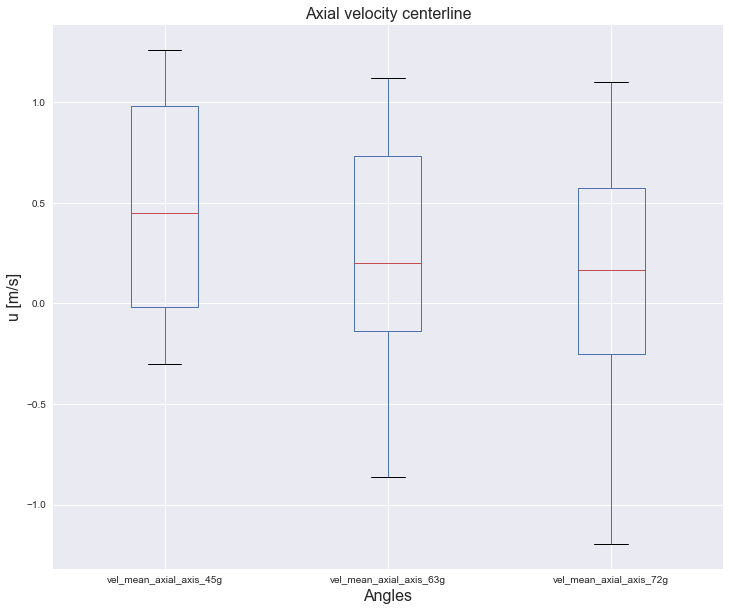

In [216]:
plt.figure(figsize=(12, 10))
df = pd.read_excel('resultados_45g.xlsx', sheet_name=['dados_radial','dados_wall','dados_axis','dados_wall_tail','vorticidade','turbulencia'])
num=df['dados_axis']
num.boxplot(column=['vel_mean_axial_axis_45g','vel_mean_axial_axis_63g','vel_mean_axial_axis_72g']);
plt.xlabel("Angles", fontdict={'size': 16})
plt.ylabel("u [m/s]", fontdict={'size': 16})
plt.title('Axial velocity centerline', fontdict={'size': 16})
plt.show;
plt.savefig('graficos_v2/velaxial_boxplot.png')

In [ ]:
Data 

In [191]:
df_45['dados_axis']['vel_mean_axial_axis_45g'].describe()

count    4772.000000
mean        0.461165
std         0.532898
min        -0.303202
25%        -0.015118
50%         0.449531
75%         0.982780
max         1.261370
Name: vel_mean_axial_axis_45g, dtype: float64

In [192]:
df_45['dados_axis']['vel_mean_axial_axis_63g'].describe()

count    4774.000000
mean        0.224464
std         0.557221
min        -0.862936
25%        -0.136334
50%         0.203814
75%         0.733376
max         1.123460
Name: vel_mean_axial_axis_63g, dtype: float64

In [193]:
df_45['dados_axis']['vel_mean_axial_axis_72g'].describe()

count    4775.000000
mean        0.113595
std         0.613655
min        -1.196890
25%        -0.250603
50%         0.168732
75%         0.573759
max         1.099750
Name: vel_mean_axial_axis_72g, dtype: float64

In [247]:
df1 = df_45['dados_axis'] ##.loc[df_45['vel_mean_axial_axis_45g']==-0.303202]
df1.loc[df1['vel_mean_axial_axis_45g']==-0.303202]

,x_axis,pressao_estatica_axis,pressao_total_axis,vel_mean_axial_axis_45g,vel_mean_axial_axis_63g,vel_mean_axial_axis_72g,Unnamed: 6,Unnamed: 7
1330,1.05403,-5767.38,-4118.93,-0.303202,-0.67753,-0.814611,NaN,NaN


In [248]:
df2 = df_63['dados_axis']
df2.loc[df2['vel_mean_axial_axis_63g']==-0.862936]

,x_axis,pressao_estatica_axis,pressao_total_axis,vel_mean_axial_axis_63g,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1540,1.19494,-7938.05,-5426.53,-0.862936,NaN,NaN,NaN,NaN


In [249]:
df3 = df_72['dados_axis']
df3.loc[df3['vel_mean_axial_axis_72g']==-1.196890]

,x_axis,pressao_estatica_axis,pressao_total_axis,vel_mean_axial_axis_72g,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1568,1.21323,-9697.6,-6578.85,-1.19689,NaN,NaN,NaN,NaN


In [278]:
vel_tang2 = df_45['dados_radial']['vel_tang_5d']
r_d2 = df_45['dados_radial']['r_5d']
div_v=np.diff(vel_tang2)/np.diff(r_d2)
div_v.mean()

-175.08411748398655

In [279]:
vel_tang3 = df_45['dados_radial']['vel_tang_10d']
r_d3 = df_45['dados_radial']['r_10d']
div_v2=np.diff(vel_tang3)/np.diff(r_d3)
div_v2.mean()

-86.82710005264424

In [286]:
vel_tang4 = df_45['dados_radial']['vel_tang_15d']
r_d4 = df_45['dados_radial']['r_15d']
div_v3=np.diff(vel_tang4)/np.diff(r_d4)
div_v3.mean()

-84.19402540089018

In [45]:
(df_45['dados_radial']['vel_radial_5d'].mean()/df_45['dados_radial']['vel_tang_5d'].mean())*-100

0.07594279695759783

In [46]:
(df_63['dados_radial']['vel_radial_5d'].mean()/df_63['dados_radial']['vel_tang_5d'].mean())*-100

0.04668721309275347

In [47]:
(df_72['dados_radial']['vel_radial_5d'].mean()/df_72['dados_radial']['vel_tang_5d'].mean())*-100

0.07341651371836545

In [111]:
R = 0.025
Ub = 0.984712482
S=( (2*np.pi*(np.trapz((df_72['dados_radial']['vel_axial_60d']*df_72['dados_radial']['r_60d']*df_72['dados_radial']['vel_tang_60d']*df_72['dados_radial']['r_60d']), df_72['dados_radial']['r_60d'])))/(np.pi*(R**3)*(Ub**2)))
S

0.1927699621372088